<a href="https://colab.research.google.com/github/ThatOtherBrandon/PortfolioProjects/blob/main/RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, we embark on a journey into the realm of wine quality prediction, leveraging the power of regression analysis. Our aim is to unravel the intricate relationship between the chemical attributes of wines and their quality, with quality serving as our focal target variable. Through meticulous examination and analysis, we seek to uncover the key factors that contribute to the overall perception of wine quality, offering valuable insights for wine enthusiasts, producers, and connoisseurs alike.
Target = Quality

# Data Preparation

During the data preparation phase, I undertook a comprehensive analysis to evaluate the correlation between variables and our target variable. This meticulous process included a thorough examination of missing values to uphold the integrity of our dataset, ensuring robustness in subsequent analyses and model development.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IS470_Data/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# Examine missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# exploring relationships among all numeric variables: correlation matrix
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
df['alcohol'].max()

14.9

In [ ]:
# Partition the data
target = df['quality']
predictors = df.drop(['quality'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


To wrap up getting my data preparation, I checked for missing variables or incorrectly labeled data types. Additionally, I conducted a thorough examination of variable correlations with the target variable, identifying any highly correlated variables that could impact model performance. Lastly, I split the data into parts for training and testing, setting up a solid foundation for building and testing my models.

## Visulations

In my visualizations, I leveraged the power of heatmaps, box plots, and histograms to present my data in a visually engaging manner. These tools enabled me to delve deeper into understanding variable correlations and to explore how different qualities compared within the entire dataset. This visual approach not only provided a clear perspective but also enhanced my insights into the intricate relationships and nuances present in the data.

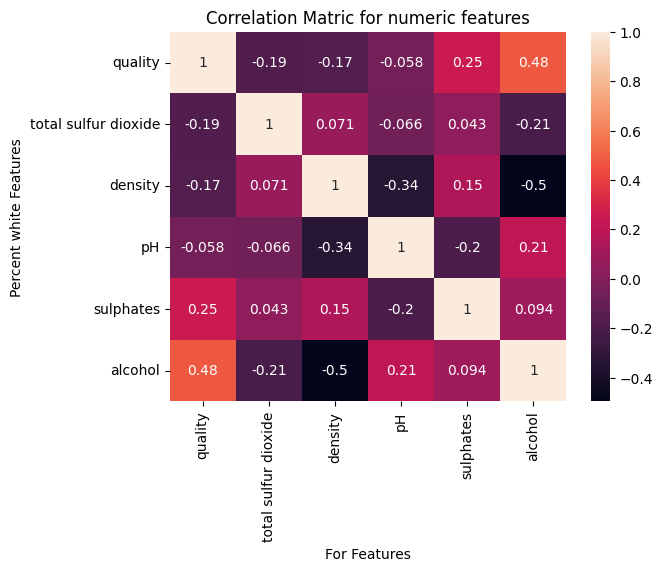

In [ ]:
# I split the variables into two groups to get a clearer image.
correlation_matrix = df[['quality', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'  ]].corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for numeric features')

plt.xlabel('For Features')

plt.ylabel('Percent white Features')

plt.show()

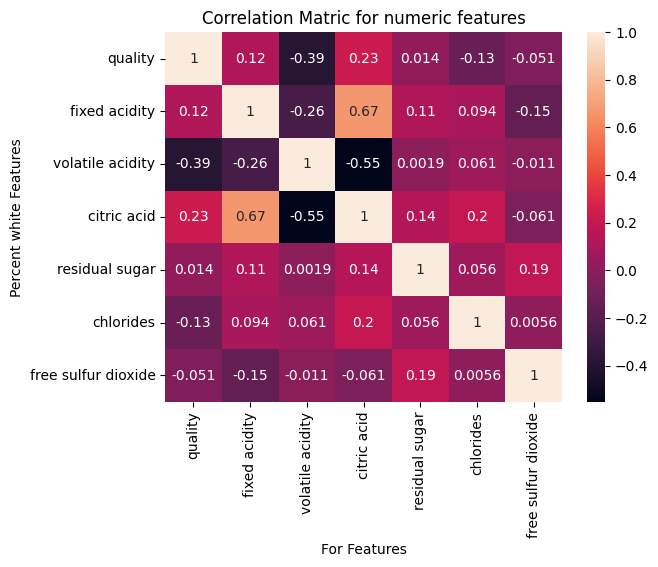

In [ ]:
# In this visulation I wanted to see how a few variables were related to my target variable.
correlation_matrix = df[['quality','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide'  ]].corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for numeric features')

plt.xlabel('For Features')

plt.ylabel('Percent white Features')

plt.show()

Text(0.5, 1.0, 'Boxplot of alcohol percentage')

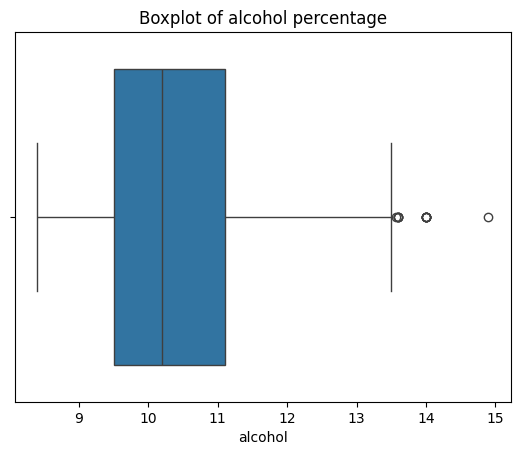

In [ ]:
# Boxplot of a numeric variable: alcohol
snsplot = sns.boxplot(x='alcohol', data = df)
snsplot.set_title("Boxplot of alcohol percentage")

In [ ]:
# Looking at if higher alcohol will equal higer quality.
df[(df['alcohol'] >= 14) & (df['quality'] >= 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6


Text(0.5, 1.0, 'Histogram of expenses in the insurance data set')

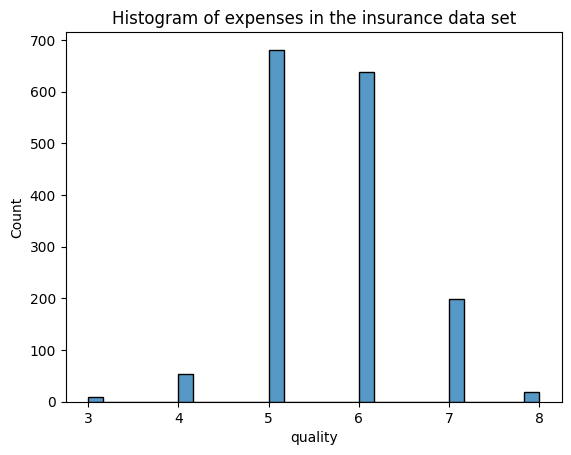

In [ ]:

# Histogram of Quality
snsplot = sns.histplot(x='quality', data = df)
snsplot.set_title("Histogram of expenses in the insurance data set")

Text(0.5, 1.0, 'Scatterplot of qulaity and alcohol')

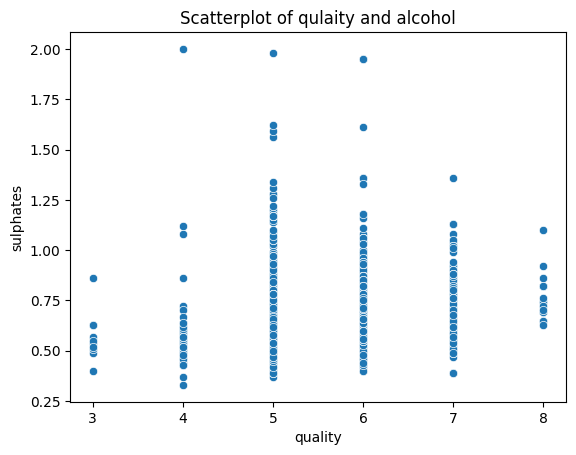

In [ ]:
# scatter plot two numeric variables: quality & sulphates
snsplot = sns.scatterplot(x='quality', y= 'sulphates', data=df)
snsplot.set_title("Scatterplot of qulaity and alcohol")

Text(0.5, 1.0, 'Histogram of pH levels')

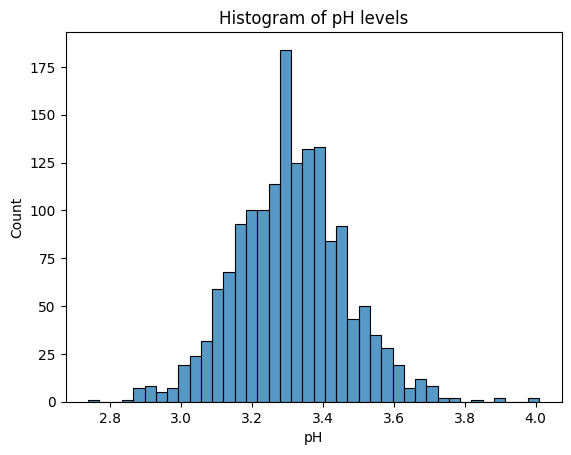

In [ ]:
# Histogram of Quality
snsplot = sns.histplot(x='pH', data = df)
snsplot.set_title("Histogram of pH levels")

# Model Development

In my Model Development phase, I embarked on an exploration of diverse regression techniques, totaling 5 distinct models. This encompassed the classical Ordinary Least Squares (OLS) approach, applied both in simple and multiple regression scenarios. Additionally, I ventured into the realm of decision trees with a regression tree model, harnessed the power of Support Vector Regression (SVR), and delved into the intricacies of neural networks through a Multilayer Perceptron (MLP) model. This comprehensive approach allowed me to leverage a range of methodologies to best capture the nuances of the data and enhance predictive accuracy.

## Simple Liner Regression

In my initial model, I'll delve into a straightforward linear regression approach, employing alcohol content as the primary predictor variable.

In [ ]:
# Build a simple linear regression model with only alcohol as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train[['alcohol']], target_train)

LinearRegression()

In [ ]:
# Show model summary
X2 = sm.add_constant(predictors_train[['alcohol']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     303.8
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.29e-60
Time:                        02:33:55   Log-Likelihood:                -1235.3
No. Observations:                1119   AIC:                             2475.
Df Residuals:                    1117   BIC:                             2485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9289      0.215      8.985      0.0

In [ ]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test[['alcohol']])

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_model1 = mean_absolute_error(target_test, prediction_on_test)
RMSE_model1 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_model1)
print("RMSE:",RMSE_model1 )

MAE: 0.5230974814995663
RMSE: 0.6623121357628291


In the simple regression model, alcohol emerged as a significant factor in predicting wine quality. This claim is supported by several factors. Firstly, the coefficient for alcohol was found to be 0.3575, indicating a meaningful impact on wine quality for every one-unit increase in alcohol content. The small standard error of 0.021 suggests a precise estimate of this coefficient. Furthermore, the high t-value and low p-value reinforce the statistical significance of the relationship between alcohol content and wine quality, indicating that this relationship is unlikely to occur by chance alone.

## Multiple linear regression

Transitioning from simple linear regression, I'm delving into the realm of multiple linear regression. This advanced approach allows me to consider all potential predictors, uncovering the pivotal factors that significantly impact wine quality prediction.

In [ ]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [ ]:
# Show model summary
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     59.35
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.86e-103
Time:                        02:33:55   Log-Likelihood:                -1110.6
No. Observations:                1119   AIC:                             2245.
Df Residuals:                    1107   BIC:                             2305.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.0111 

In [ ]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_model2 = mean_absolute_error(target_test, prediction_on_test)
RMSE_model2 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_model2)
print("RMSE:",RMSE_model2 )

MAE: 0.4871262164592797
RMSE: 0.6330721652189466


In the multiple linear regression model, it became evident that multiple variables play a significant role in predicting wine quality. Notably, volatile acidity, chlorides, total sulfur dioxide, sulphates, and alcohol emerged as key factors with a p-value of 0.0, indicating strong statistical significance. Among these, sulphates stood out as particularly influential, evidenced by its coefficient of 0.854 and a low standard error of just 0.132, coupled with a p-value of 0.0, highlighting its significant impact on wine quality.

## Regression Tree

I will be preforming a regression Tree to see if it preforms better then my two models above. I will try a few different max depths and see which one give the best result.

In [ ]:
# Partition the data
target = df['quality']
predictors = df.drop(['quality'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [ ]:
# Build a regression tree model with max_depth=3
model3 = DecisionTreeRegressor(random_state=0, max_depth=4)
model3.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

[Text(0.5, 0.9, 'alcohol <= 10.525\nsquared_error = 0.677\nsamples = 1119\nvalue = 5.651'),
 Text(0.25, 0.7, 'sulphates <= 0.555\nsquared_error = 0.434\nsamples = 690\nvalue = 5.384'),
 Text(0.125, 0.5, 'chlorides <= 0.169\nsquared_error = 0.281\nsamples = 230\nvalue = 5.122'),
 Text(0.0625, 0.3, 'residual sugar <= 1.25\nsquared_error = 0.258\nsamples = 228\nvalue = 5.136'),
 Text(0.03125, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.09375, 0.1, 'squared_error = 0.244\nsamples = 227\nvalue = 5.128'),
 Text(0.1875, 0.3, 'chlorides <= 0.219\nsquared_error = 0.25\nsamples = 2\nvalue = 3.5'),
 Text(0.15625, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.21875, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.375, 0.5, 'total sulfur dioxide <= 46.5\nsquared_error = 0.458\nsamples = 460\nvalue = 5.515'),
 Text(0.3125, 0.3, 'pH <= 3.535\nsquared_error = 0.466\nsamples = 246\nvalue = 5.691'),
 Text(0.28125, 0.1, 'squared_error = 0.413\nsamples = 

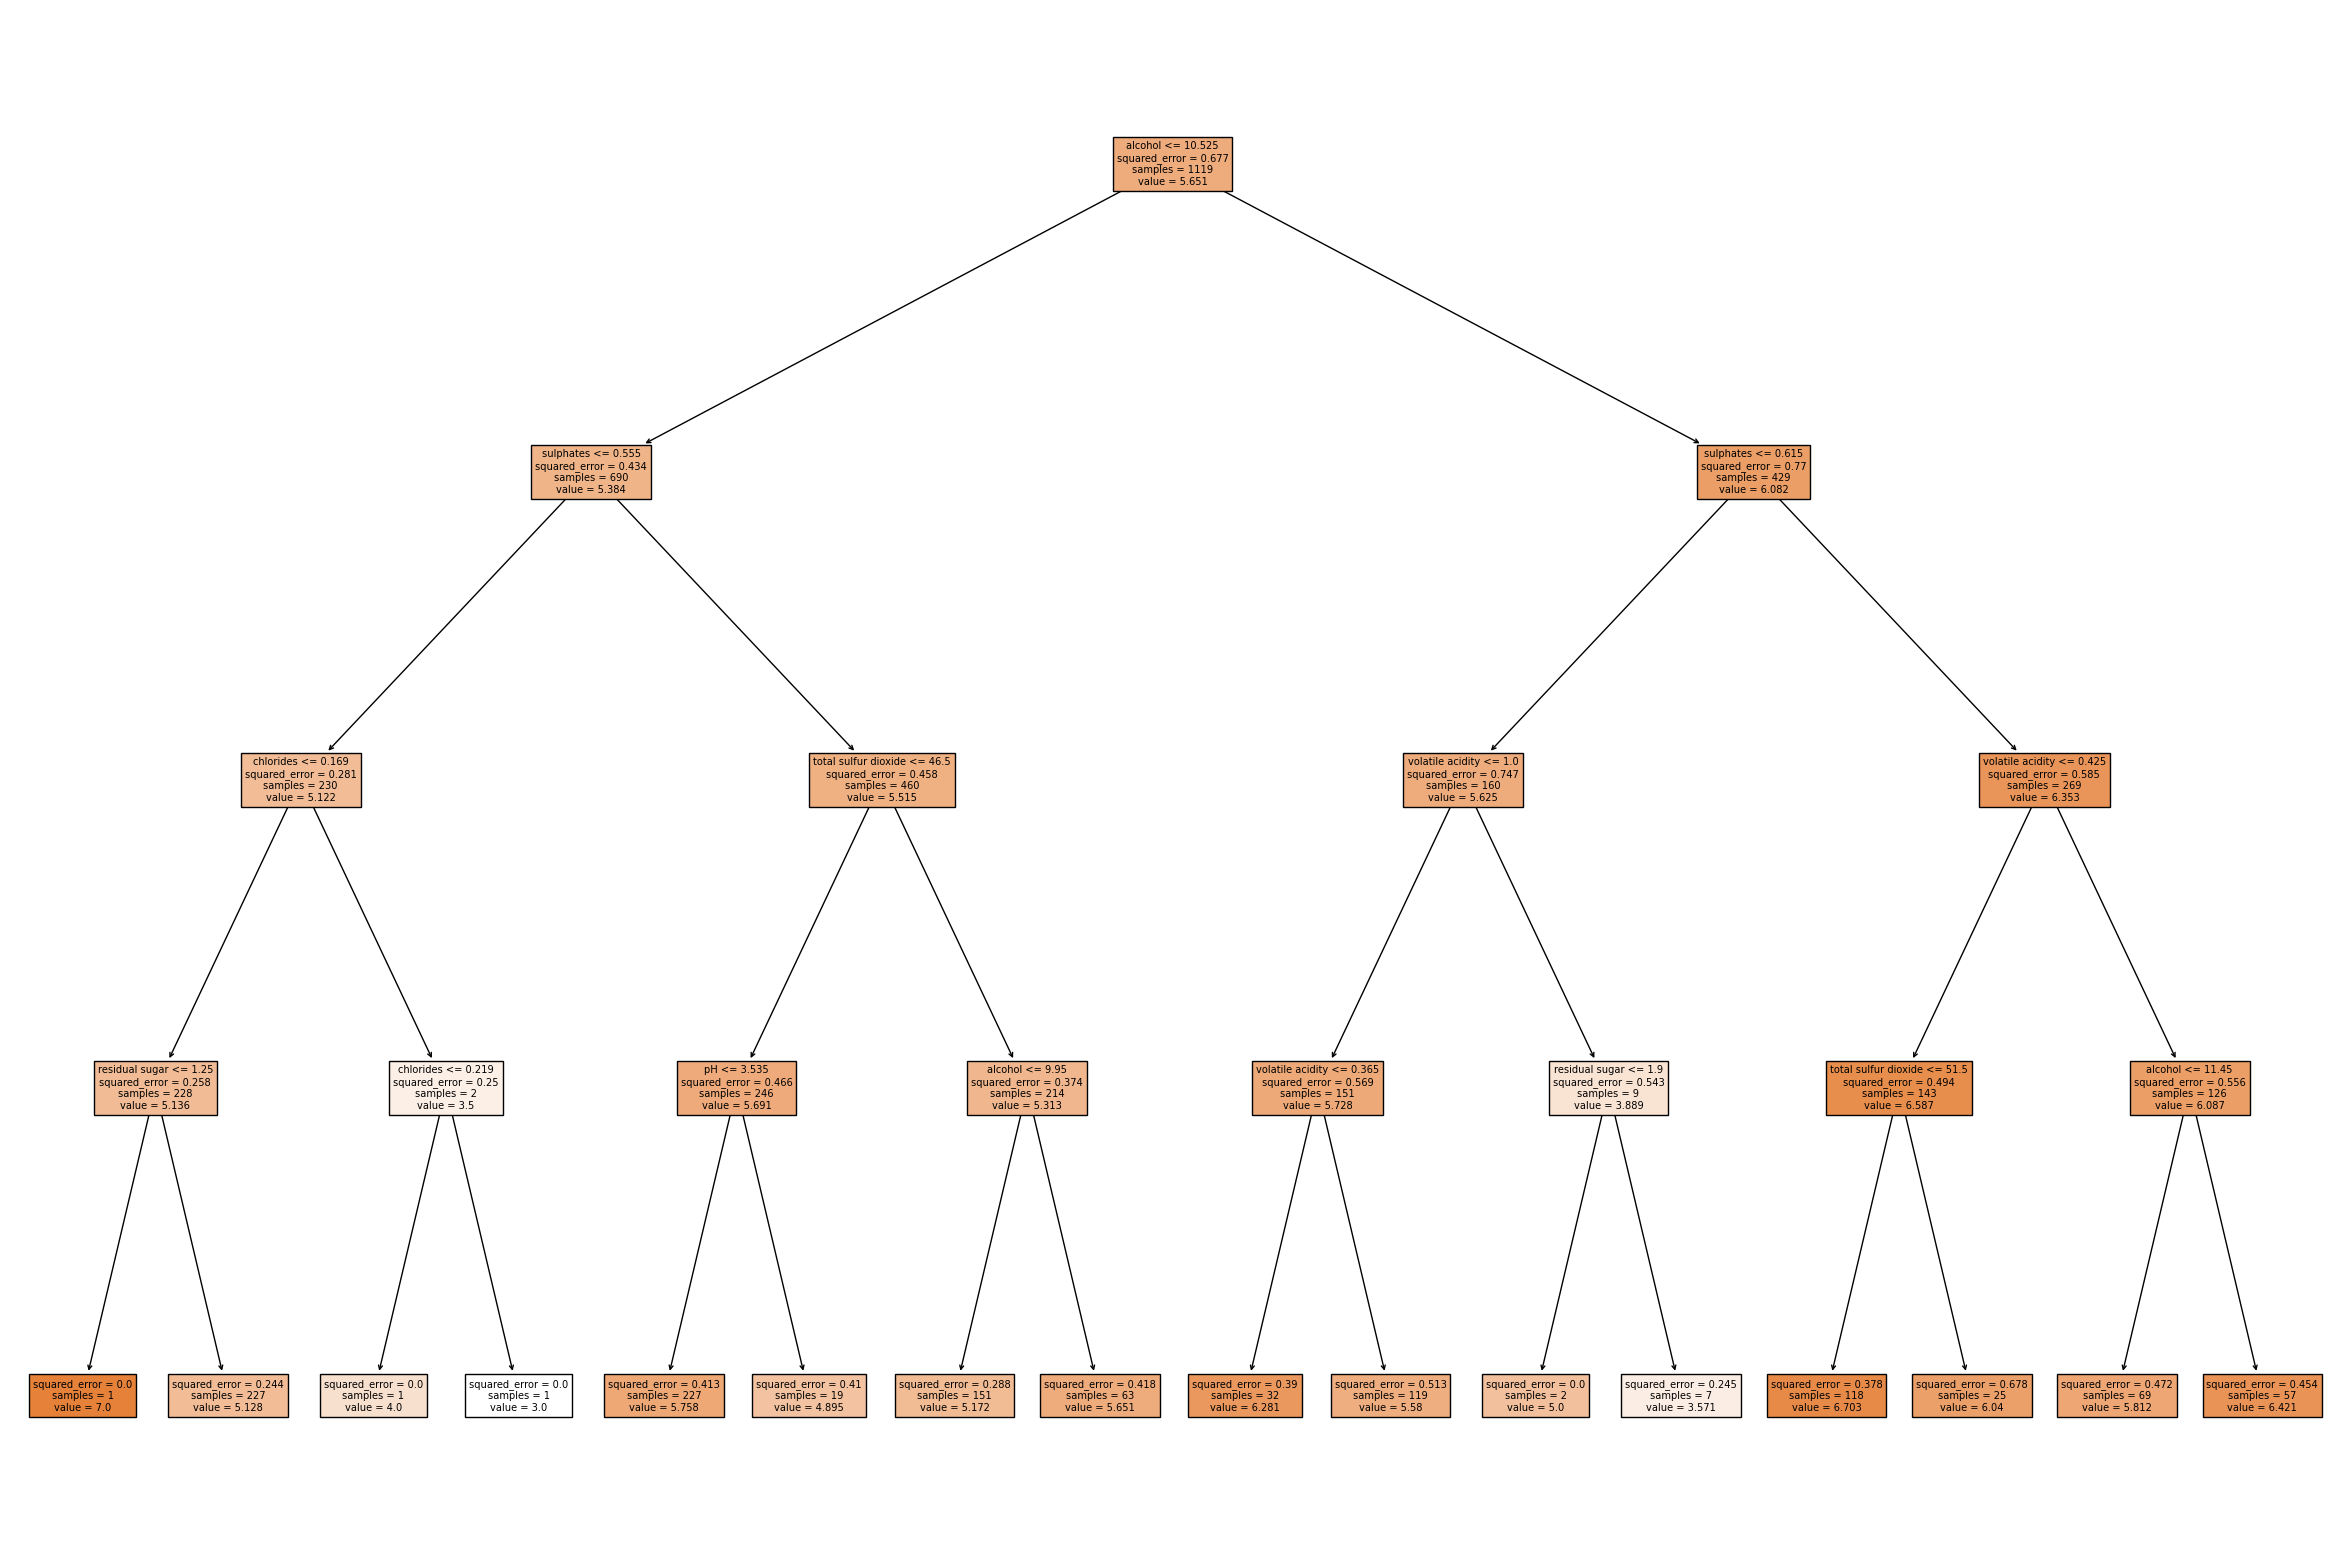

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(predictors_train.columns),
               filled=True)

In [ ]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_model3 = mean_absolute_error(target_test, prediction_on_test)
RMSE_model3 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_model3)
print("RMSE:", RMSE_model3)

MAE: 0.5324645271825872
RMSE: 0.694266470504068


After experimenting with different maximum depths ranging from 3 to 5 in a regression tree model, it was found that a maximum depth of 4 yielded the best results. While the model's overall performance is not optimal, it provides valuable insights. The MAE of the model was 0.532, indicating its robustness against outliers, as MAE is less sensitive to extreme values. On the other hand, the RMSE was 0.694, suggesting that the model is more sensitive to larger errors in predictions. These metrics highlight the trade-off between handling outliers and overall predictive accuracy in the regression tree model.

## Support Vector Regression (SVR)

In this phase, I'll use Support Vector Regression (SVR) due to its effectiveness with non-linear relationships. I'll run three models, increasing the parameter C each time to optimize our approach for handling complex data dynamics.

In [ ]:
# Build a SVM model with default setting (C = 1.0)
model_SVM1 = SVR()
model_SVM1.fit(predictors_train, target_train)

SVR()

In [ ]:
# Make predictions on testing data
prediction_on_test = model_SVM1.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_SVM1 = mean_absolute_error(target_test, prediction_on_test)
RMSE_SVM1 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_SVM1)
print("RMSE:", RMSE_SVM1)

MAE: 0.5372875742404191
RMSE: 0.7131247064180449


In [ ]:
# Build a SVM model with default setting (C = 15.0)
model_SVM2 = SVR(C = 15.0)
model_SVM2.fit(predictors_train, target_train)

SVR(C=15.0)

In [ ]:
# Make predictions on testing data
prediction_on_test = model_SVM2.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_SVM2 = mean_absolute_error(target_test, prediction_on_test)
RMSE_SVM2 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_SVM2)
print("RMSE:", RMSE_SVM2)

MAE: 0.48935577180603945
RMSE: 0.6423786267635615


In [ ]:
# Build a SVM model with default setting (C = 15.0)
model_SVM3 = SVR(C = 150.0)
model_SVM3.fit(predictors_train, target_train)

SVR(C=150.0)

In [ ]:
# Make predictions on testing data
prediction_on_test = model_SVM3.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_SVM3 = mean_absolute_error(target_test, prediction_on_test)
RMSE_SVM3 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_SVM3)
print("RMSE:", RMSE_SVM3)

MAE: 0.4791126640239236
RMSE: 0.6221863367422551


After performing the three models, the third SVM model with C = 150 stood out for delivering the best results. When using a small value of C, it allowed for a wider margin, potentially enhancing the model's generalization to unseen data. However, in this case, it didn't yield better results and sacrificed some accuracy. On the other hand, using a large value of C narrowed the margins, leading to a stricter fit to the training data. Although this could risk overfitting, it resulted in my best outcomes, with MAE reaching 0.479 and RMSE = 0.622. These results were the closest to matching predictions with actual values compared to my earlier models.

## Multi-layer Perceptron (MLP)

In this model, I'll harness the power of Multi-layer Perception (MLP) to forecast the quality of red wine. This advanced technique is poised to unlock deeper insights and provide accurate predictions, enhancing our understanding of wine quality dynamics.

In [ ]:
#Build MLP model contains two hidden layers: 16 hidden nodes for the first layer, and 8 hidden nodes for the second layer. Set random_state=1.
model_MLP1 = MLPRegressor(hidden_layer_sizes=(16,8), random_state=1)
model_MLP1.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)

In [ ]:
# Make predictions on testing data
prediction_on_test = model_MLP1.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_MLP1 = mean_absolute_error(target_test, prediction_on_test)
RMSE_MLP1 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_MLP1)
print("RMSE:", RMSE_MLP1)

MAE: 0.5723368999426094
RMSE: 0.7342746057910711


In [ ]:
# Build MLP model contains three hidden layers: 8 hidden nodes for the first layer, 4 hidden nodes for the second layer, and 4 hidden nodes for the third layer. Set random_state=1.
model_MLP2 = MLPRegressor(hidden_layer_sizes=(8,4,4), random_state=1)
model_MLP2.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(8, 4, 4), random_state=1)

In [ ]:
# Make predictions on testing data
prediction_on_test = model_MLP2.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_MLP2 = mean_absolute_error(target_test, prediction_on_test)
RMSE_MLP2 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_MLP2)
print("RMSE:", RMSE_MLP2)

MAE: 0.5085510829192287
RMSE: 0.6595410130226158


In [ ]:
# Trying 15, 5, 4
model_MLP3 = MLPRegressor(hidden_layer_sizes=(15,5,4), random_state=1)
model_MLP3.fit(predictors_train, target_train)

MLPRegressor(hidden_layer_sizes=(15, 5, 4), random_state=1)

In [ ]:
# Make predictions on testing data
prediction_on_test = model_MLP3.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_MLP3 = mean_absolute_error(target_test, prediction_on_test)
RMSE_MLP3 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_MLP3)
print("RMSE:", RMSE_MLP3)

MAE: 0.49740598547561776
RMSE: 0.6480900927746481


In my MLP model, I achieved notable results with a MAE of 0.497 and an RMSE of 0.648. This was accomplished with a thoughtful design, featuring an input layer of 15 neurons, 5 hidden layers, and an output layer of 4 neurons. Moving forward, I'll focus on meticulous design, fine-tuning, and rigorous training to push the boundaries and achieve even better results.

# Model Comparison

In the model comparison section, I'll present a bar chart showcasing the top 5 models. Following this visual representation, I'll provide a comprehensive analysis to delve deeper into the performance and nuances of each model.

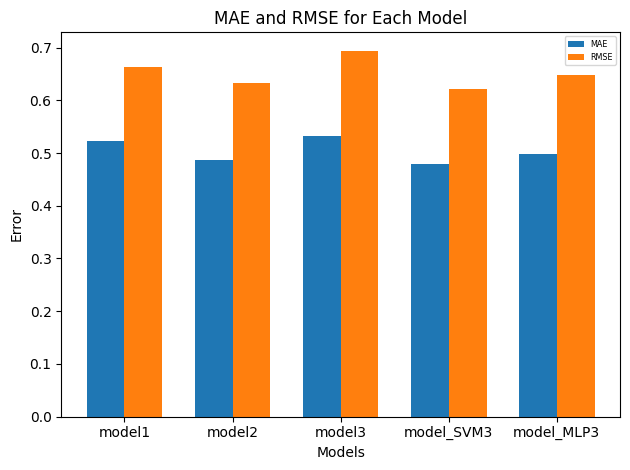

In [ ]:
Models = ['model1','model2', 'model3','model_SVM3','model_MLP3']
MAE_values = [MAE_model1, MAE_model2, MAE_model3, MAE_SVM3, MAE_MLP3]
RMSE_values = [RMSE_model1, RMSE_model2, RMSE_model3, RMSE_SVM3, RMSE_MLP3]

# Plotting the bar chart
fig, ax = plt.subplots()
index = range(len(Models))
bar_width = 0.35

#plotting MAE and RMSE
bars1 = ax.bar(index, MAE_values, bar_width, label='MAE')
bars2 = ax.bar([p + bar_width for p in index], RMSE_values, bar_width, label='RMSE')

# Adding lables and titles
ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('MAE and RMSE for Each Model')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(Models)
ax.legend(fontsize='xx-small')


plt.tight_layout()
plt.show()

In the graph above, three models emerged as standout performers: model 2 using multiple linear regression, model_SVM3 using support vector regression, and model_MLP3 using multi-layer perception. Among them, model_SVM3 delivered the best performance with a MAE of 0.479 and RMSE of 0.622. Its success can be attributed to its adeptness in handling non-linear relationships and the flexibility to adjust the parameter C, allowing it to capture complex data dynamics and similarities effectively. I carefully tuned C to find the optimal value, as higher C values led to overfitting and decreased performance.The multiple linear regression model also showcased strong performance, yielding a MAE of 0.487 and RMSE of 0.633. This model played a crucial role in identifying significant predictors of wine quality. While slightly trailing behind, the MLP model exhibited promise with a MAE of 0.497 and RMSE of 0.648. Its capacity for fine-tuning suggests potential for future improvements, making it a contender for enhanced performance over time. Models 1 and 3 fell slightly short in my analysis. Model 1 underscored the critical importance of alcohol in predicting quality, but it became evident that more variables were necessary for a comprehensive prediction. Creating separate simple linear regression models for each variable was deemed impractical, leading me to opt for the more practical approach of multiple linear regression. As for model 3, which utilized a regression tree, I found that increasing the max depth beyond 4 resulted in diminishing performance. To enhance this model, a deeper exploration of the dataset is needed to reduce noise and extract more meaningful insights. Overall, Support Vector Regression emerged as the top performer in predicting red wine quality. However, I'm confident that with deeper scrutiny and refinement in subsequent stages of this project, I can enhance the model's accuracy even further.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/IncremonaBrandon3"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IncremonaBrandon3.ipynb to html
[NbConvertApp] Writing 1407966 bytes to /content/drive/MyDrive/Colab Notebooks/IncremonaBrandon3.html
